In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
data = pd.read_csv("airbnb.csv")

In [97]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# 1. Jelaskan apa gambaran besar yang anda dapatkan dari data tersebut.

Dari data tersebut terlihat riwayat ketersediaan home stay untuk bagi para traveler yang menggunakan platform AirBnB, informasi yang tersedia dimulai dari nama home stay, lokasi, harga dan lain sebagainya.


# 2. Tunjukkan properties dari data pada setiap kolom, seperti type, missing value, dan lain-lain.

In [98]:
# diketahui ada 48895 rows × 16 columns
data.shape

(48895, 16)

In [99]:
#mengetahui masing-masing jumlah data yang tidak kosong 
#mengetahui tipe data untuk setiap kolom
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [100]:
#mengetahui jumlah mising value untuk setiap kolom
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# 3. Tunjukkan jumlah data, mean, median, dan standar deviasi.

In [101]:
#jumlah data, mean, median(50%), std dari data
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# 4. Berapa harga minimal dan maksimal?

In [102]:
#maksimum harga
data['price'].max()

10000

In [103]:
#minimum harga
data['price'].min()

0

# 5. Selesaikan masalah missing value dengan cara berikut:

a. Drop kolom-kolom yang mengandung missing value yang tidak dapat diisi dengan nilai yang logis, seperti nama, host_id, dan lain-lain.

In [104]:
#kolom yang memliki missing value yaitu (bernilai True) ada 4 :
#name, host_name, last,review, review_per_month
data.isna().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [105]:
#drop kolom name dan host_name karna tidak mungkin diisi 
data.drop(['name','host_name'], inplace=True, axis=1) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_count  

b. Isi missing value pada kolom last_review dengan data yang paling banyak muncul.

In [110]:
data['last_review'].isna().sum()

10052

In [111]:
data['last_review'].head()

0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
Name: last_review, dtype: object

In [112]:
#nilai modus pada kolom last_review
data['last_review'].mode()

0    2019-06-23
Name: last_review, dtype: object

In [113]:
#terdapat 10052 data mising yang akan diisi dengan modus data
data['last_review'].isna().sum()

10052

In [114]:
#mengganti nilai missing value dengan modus pada kolom data last_review
data['last_review'] = data['last_review'].fillna(data['last_review'].mode()[0])

In [115]:
#melakukan pengecekan terhadap jumlah missing value
data['last_review'].isna().sum()

0

c. Isi missing value pada kolom reviews_per_month dengan mean

In [116]:
#mengecek jumlah missing data pada kolom revies_per_month
data['reviews_per_month'].isna().sum()

10052

In [117]:
#melihat bentuk data pada kolom reviews_per_month
data['reviews_per_month'].head()

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
Name: reviews_per_month, dtype: float64

In [118]:
#mengganti nilai missing data menggunakan data rata-rata
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())

In [119]:
#mengecek kembali jumlah missing data pada kolom reviews_per_month
data['reviews_per_month'].isna().sum()

0

# 6. Buat kategori berdasarkan Price: Cheap, Medium, dan Expensive

In [120]:
#menyimpan data pada kolom price pada variabel data_harga
data_harga = data['price'].value_counts()
data_harga

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

In [121]:
#melakukan export data frame pada variabel data_harga
data_harga.to_csv('data_harga.csv')

In [122]:
#melakukan import data yang di export sebelumnya kemudian menyimpannya pada variabel data_harga_import
data_harga_import = pd.read_csv('data_harga.csv')

In [123]:
#mengecek data hasi import
data_harga_import

,Unnamed: 0,price
0,100,2051
1,150,2047
2,50,1534
3,60,1458
4,200,1401
...,...,...
669,780,1
670,386,1
671,888,1
672,483,1


In [124]:
#menyiapkan nama kolom baru untuk data yang telah di import
new_col = {'Unnamed: 0':'Price', 'price':'Frequency'}

In [125]:
#perubahan nama kolom dilakukan karena nama kolom tidak sesuai
data_harga_import.rename(columns=new_col,inplace=True)

In [126]:
#menecek perubahan nama kolom
data_harga_import

,Price,Frequency
0,100,2051
1,150,2047
2,50,1534
3,60,1458
4,200,1401
...,...,...
669,780,1
670,386,1
671,888,1
672,483,1


In [127]:
#mencek persebaran data dan membuat pengkategorian harga berdasarkan kuartil data
data_harga_import.describe()

,Price,Frequency
count,674.000000,674.000000
mean,702.759644,72.544510
std,1173.814787,220.373738
min,0.000000,1.000000
25%,179.250000,1.000000
50%,349.500000,6.000000
75%,667.250000,38.000000
max,10000.000000,2051.000000


In [128]:
#membuat kolom baru degnan nama "Category" dan memberikan kondisional pada data
data_harga_import['Category'] = np.where(data_harga_import["Price"] > 667, "Expensive", np.where(data_harga_import["Price"] > 349, "Medium", "Cheap"))

In [129]:
#mengecek kolom baru pada data
data_harga_import

,Price,Frequency,Category
0,100,2051,Cheap
1,150,2047,Cheap
2,50,1534,Cheap
3,60,1458,Cheap
4,200,1401,Cheap
...,...,...,...
669,780,1,Expensive
670,386,1,Medium
671,888,1,Expensive
672,483,1,Medium


In [130]:
#melakukan kalkulasi terhadap jumlah masing-masing nilai pada kategori yang ada
data_harga_import['Category'].value_counts()

Cheap        337
Expensive    169
Medium       168
Name: Category, dtype: int64

# 7. Filter semua data yang memiliki last_review di > 2019

In [131]:
#menecek tipe data pada kolom last_review dan diketahui memiliki tipe data object
data['last_review'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: last_review
Non-Null Count  Dtype 
--------------  ----- 
48895 non-null  object
dtypes: object(1)
memory usage: 382.1+ KB


In [132]:
#mengubah tipe data menjadi datetime
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

In [133]:
#menecek kembali tipe data pada kolom last_review dan diketahui telah berubah menjadi datetime
data['last_review'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: last_review
Non-Null Count  Dtype         
--------------  -----         
48895 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 382.1 KB


In [134]:
#menghitung jumlah data pada setiap tahun
data['last_review'].dt.year.value_counts()

2019    35261
2018     6050
2017     3205
2016     2707
2015     1393
2014      199
2013       48
2012       25
2011        7
Name: last_review, dtype: int64

Text(0, 0.5, 'Freq')

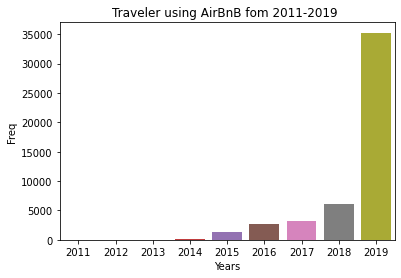

In [135]:
#melihat secara grafik jumlah review dalam tahun
sns.countplot(x=data['last_review'].dt.year);

plt.title('Traveler using AirBnB fom 2011-2019 ')
plt.xlabel('Years')
plt.ylabel('Freq')

Diketahui terdapat data dari tahun 2011 sampai 2019

In [137]:
#melakukan filter untuk data pada tahun 2019
data.loc[data['last_review'].dt.year == 2019]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2


# 8. Visualisasikan Price untuk membandingkan harga kamar yang tersedia

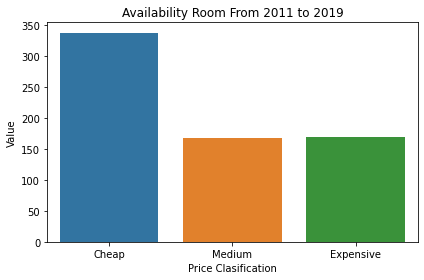

In [138]:
#melakukan visualisasi data terhadap kamar yang pernah dipesan dari tahun 2011 hingga 2019 untuk setiap kategori
sns.countplot(x=data_harga_import['Category'])
plt.title('Availability Room From 2011 to 2019')
plt.xlabel('Price Clasification')
plt.ylabel('Value')
plt.tight_layout()

# 9. Lokasi ketersediaan home stay terebanyak

In [139]:
data.head(5)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [140]:
neighbourhood_group = data['neighbourhood_group'].value_counts()

In [141]:
neighbourhood_group.to_csv('neighbourhood_group.csv')

In [142]:
neighbourhood_group_import = pd.read_csv('neighbourhood_group.csv')

In [143]:
neighbourhood_group_import

,Unnamed: 0,neighbourhood_group
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


In [144]:
new_col_neighbourhood_group = {'Unnamed: 0':'Area','neighbourhood_group':'Frequency'}

In [145]:
neighbourhood_group_import.rename(columns=new_col_neighbourhood_group, inplace=True)

In [146]:
neighbourhood_group_import

,Area,Frequency
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


In [147]:
nbh_x = neighbourhood_group_import['Area']
nbh_y = neighbourhood_group_import['Frequency']

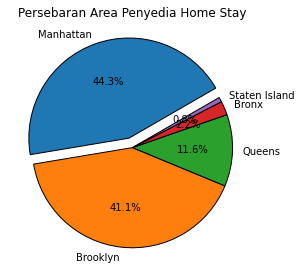

In [148]:
explode = [0.1, 0, 0, 0, 0]

plt.pie(nbh_y, labels=nbh_x, explode=explode, startangle=30,autopct = '%1.1f%%',
       wedgeprops={'edgecolor': 'black'})
plt.title("Persebaran Area Penyedia Home Stay")
plt.tight_layout()
plt.show()

# 10. Type kamar yang tersedia

In [171]:
data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

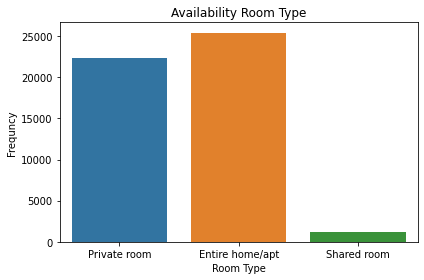

In [52]:
sns.countplot(x=data['room_type']);
plt.title('Availability Room Type')
plt.xlabel('Room Type')
plt.ylabel('Frequncy')
plt.tight_layout()

Mencaritau daerah denga harga kamar termurah

Mencaritau daerah denga harga kamar termahal

Mencaritau persebaran harga kamar masing masing tipe

In [53]:
data

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2


In [149]:
data.sort_values(by=["price"], ascending=True, inplace=True)

In [150]:
data

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.350000,6,222
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.710000,5,0
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.560000,4,127
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.530000,2,0
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.050000,4,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40433,31340283,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,2019-06-23,1.373221,1,365
12342,9528920,3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.140000,1,83
17692,13894339,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.160000,1,0
9151,7003697,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.040000,1,0


In [56]:
data_low_price = data.loc[data['price'] < 349]

In [57]:
data_med_high_price = data.loc[data['price'] > 349]

In [58]:
data_med_price = data_med_high_price.loc[data['price'] < 667]

In [59]:
data_high_price = data_med_high_price.loc[data['price'] > 667]

In [60]:
data_low_price['neighbourhood_group'].value_counts()

Manhattan        19576
Brooklyn         19433
Queens            5569
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

In [156]:
data_med_price['neighbourhood_group'].value_counts()

Manhattan        1527
Brooklyn          520
Queens             73
Bronx              16
Staten Island       3
Name: neighbourhood_group, dtype: int64

In [62]:
data_high_price['neighbourhood_group'].value_counts()

Manhattan        530
Brooklyn         137
Queens            21
Bronx              5
Staten Island      5
Name: neighbourhood_group, dtype: int64

In [63]:
data.head(5)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28


In [64]:
data_low_price['minimum_nights'].value_counts()

1      12075
2      11098
3       7402
30      3511
4       3073
       ...  
39         1
275        1
222        1
250        1
198        1
Name: minimum_nights, Length: 106, dtype: int64

In [162]:
data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28


In [163]:
data.loc[data['room_type'] == 'Entire home/apt']

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25778,20624541,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.150000,1,73
26259,20933849,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,2019-06-23,1.373221,1,0
22835,18490141,97001292,Queens,Jamaica,40.69085,-73.79916,Entire home/apt,10,1,43,2019-06-12,1.680000,1,252
23256,18835820,52777892,Manhattan,Upper East Side,40.76844,-73.95341,Entire home/apt,10,3,10,2018-10-22,0.390000,1,0
27972,21869057,11967922,Brooklyn,Greenpoint,40.72421,-73.95364,Entire home/apt,10,1,93,2019-07-01,4.730000,1,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30268,23377410,18128455,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.180000,1,251
6530,4737930,1235070,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.020000,1,0
40433,31340283,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,2019-06-23,1.373221,1,365
17692,13894339,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.160000,1,0


In [164]:
data_entire_type = data.loc[data['room_type'] == 'Entire home/apt']

In [172]:
data_entire_type['price'].describe()

count    25409.000000
mean       211.794246
std        284.041611
min          0.000000
25%        120.000000
50%        160.000000
75%        229.000000
max      10000.000000
Name: price, dtype: float64

In [169]:
data_private_type = data.loc[data['room_type'] == 'Private room']

In [170]:
data_private_type['price'].describe()

count    22326.000000
mean        89.780973
std        160.205262
min          0.000000
25%         50.000000
50%         70.000000
75%         95.000000
max      10000.000000
Name: price, dtype: float64

In [173]:
data_share_type = data.loc[data['room_type'] == 'Shared room']
data_share_type['price'].describe()

count    1160.000000
mean       70.127586
std       101.725252
min         0.000000
25%        33.000000
50%        45.000000
75%        75.000000
max      1800.000000
Name: price, dtype: float64